In [1]:
import os
os.chdir('..')

## 1- Definition of arguments for function usage

In [2]:
import sys
import os
import pandas as pd
from flexiprune import *
import argparse
sys.argv = ['']

parser = argparse.ArgumentParser(description='Parameters for training')

parser.add_argument('--dataset', type=str, default="CIFAR10", 
                    help='Specify the dataset for training (e.g., CIFAR10, "Name of custom dataset").')

parser.add_argument('--eval_metric', default="accuracy", 
                    help='Specify the evaluation metric (e.g., accuracy, f1).')

args = parser.parse_args()


In [3]:
df = pd.read_csv(f'results/{args.dataset}/results_{args.dataset}.csv', sep=';').iloc[:,1:] #change sep if necessary
df

,model_paths,pruning_type,model_type,gpd_base,seed,finetuned,dataset,metric,metric_used
0,models/CIFAR10\VGG16_CIFAR10_random_PD2_GPD-20...,random,PD2,20.0,112.0,True,CIFAR10,94.11,accuracy
1,models/CIFAR10\VGG16_CIFAR10_random_PD2_GPD-20...,random,PD2,20.0,167.0,True,CIFAR10,94.35,accuracy
2,models/CIFAR10\VGG16_CIFAR10_random_PD2_GPD-20...,random,PD2,20.0,23.0,True,CIFAR10,94.22,accuracy
3,models/CIFAR10\VGG16_CIFAR10_random_PD2_GPD-20...,random,PD2,20.0,42.0,True,CIFAR10,94.19,accuracy
4,models/CIFAR10\VGG16_CIFAR10_random_PD2_GPD-20...,random,PD2,20.0,97.0,True,CIFAR10,94.28,accuracy
...,...,...,...,...,...,...,...,...,...
206,models/CIFAR10\VGG16_CIFAR10_weight_PD4_GPD-20...,weight,PD4,20.0,23.0,False,CIFAR10,10.00,accuracy
207,models/CIFAR10\VGG16_CIFAR10_weight_PD4_GPD-30...,weight,PD4,30.0,23.0,True,CIFAR10,94.23,accuracy
208,models/CIFAR10\VGG16_CIFAR10_weight_PD4_GPD-30...,weight,PD4,30.0,23.0,False,CIFAR10,10.00,accuracy
209,models/CIFAR10\VGG16_CIFAR10_weight_PD4_GPD-50...,weight,PD4,50.0,23.0,True,CIFAR10,93.11,accuracy


## 2- Boxplot PD

d:\UMNG-2023\Paper softwareX\repo3\FlexiPrune\flexiprune\metrics.py:79: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pruned = df_pruned[(df_pruned['finetuned'] == finetuned) | (df['pruning_type'] != df['pruning_type'])][['model_type', 'metric']]
d:\UMNG-2023\Paper softwareX\repo3\FlexiPrune\flexiprune\metrics.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='model_type', y='metric', data=df_pruned, palette=palette)


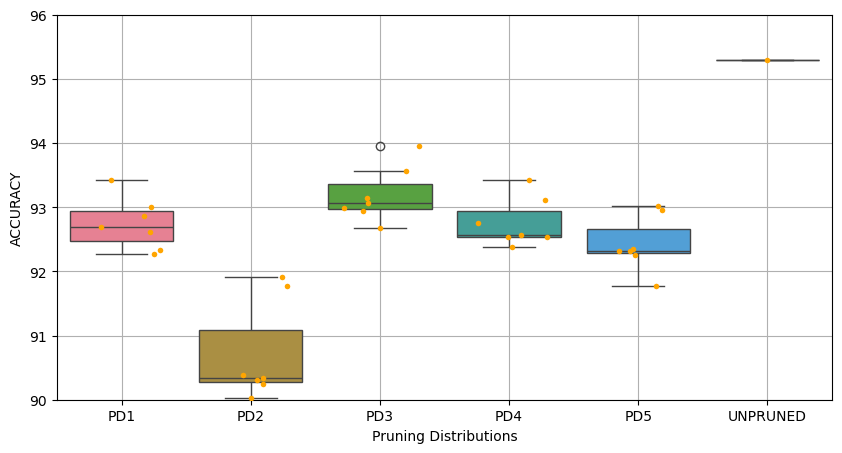

In [4]:
list_pruning = ['SenpisFaster']
list_gpd_base = [50]
file_name = f'results/{args.dataset}/SenpisFaster_GPD-50.png'
maxy = 96
miny = 90
box_plot_distribution(df,list_pruning, list_gpd_base,miny,maxy, file_name)

## 3- Barplot PD

d:\UMNG-2023\Paper softwareX\repo3\FlexiPrune\flexiprune\metrics.py:129: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Model UNPRUNED' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_pruned.fillna('Model UNPRUNED', inplace=True)


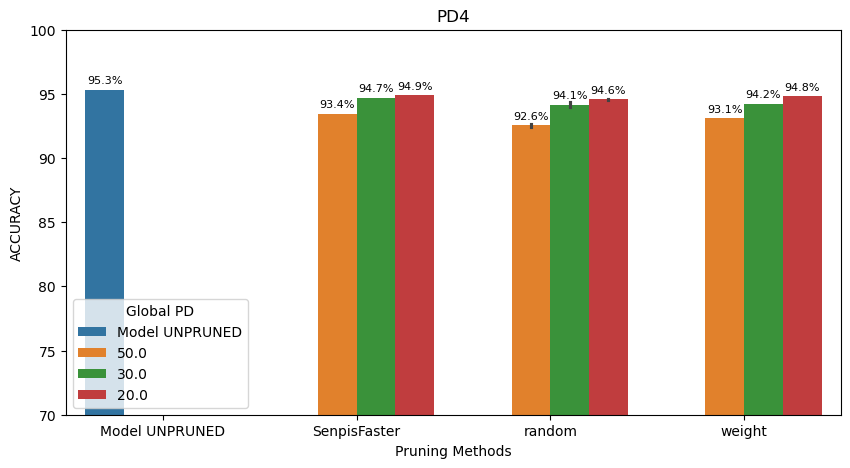

In [5]:
pdis = 'PD4'
file_name = f'results/{args.dataset}/PD_DISTRIBUTION_EXAMPLE.png'
finetuned = True
maxy = 100
miny = 70

bar_plot_distribution(df, pdis, miny, maxy,file_name, finetuned )

## 4- Barplot PD

d:\UMNG-2023\Paper softwareX\repo3\FlexiPrune\flexiprune\metrics.py:178: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_pruned.model_type[df_pruned.model_type == 'UNPRUNED'] = 'MODEL UNPRUNED'
d:\UMNG-2023\Paper softwareX\repo3\FlexiPrune\

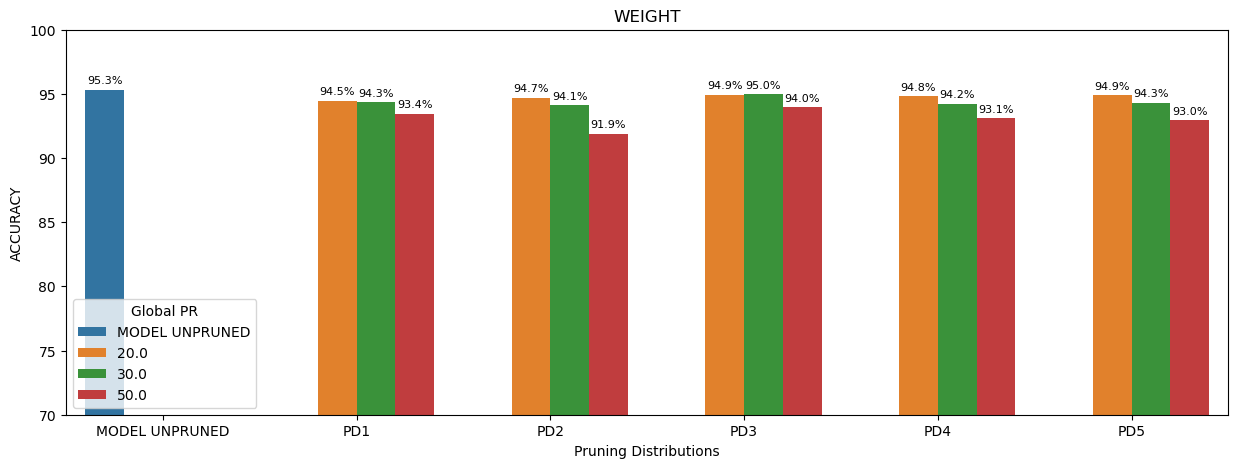

In [6]:
pruning_type = 'weight'
finetuned = True
file_name = f'results/{args.dataset}/PRUNING_METHOD_EXAMPLE.png'
maxy = 100
miny = 70

bar_plot_method(df, pruning_type, miny, maxy, file_name, finetuned)